In [158]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np

In [159]:
hotel=pd.read_csv('hotel.csv')

In [160]:
hotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [161]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1) 
    return(res) 

features_to_encode = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
for feature in features_to_encode:
    hotel = encode_and_bind(hotel, feature)

In [162]:
hotel.booking_status

0        Not_Canceled
1        Not_Canceled
2            Canceled
3            Canceled
4            Canceled
             ...     
36270    Not_Canceled
36271        Canceled
36272    Not_Canceled
36273        Canceled
36274    Not_Canceled
Name: booking_status, Length: 36275, dtype: object

In [163]:
hotel.drop('Booking_ID',axis=1,inplace=True)

In [164]:
di = {"Not_Canceled": 0,  "Canceled":1}
hotel['booking_status']=hotel['booking_status'].map(di)

In [165]:
x_train,x_test =train_test_split(hotel,train_size=0.8,test_size=0.2,random_state=415)

train_labels=x_train.pop('booking_status')
test_labels=x_test.pop('booking_status')

In [166]:
train_labels.value_counts()

0    19552
1     9468
Name: booking_status, dtype: int64

In [246]:
weights={0:1.,1:2.}

forest=RandomForestClassifier(n_estimators=50,random_state=567,class_weight=weights,max_features=5)
forest=forest.fit(x_train,train_labels)

In [247]:
feature_names=x_train.columns

feature_importance_forest=pd.DataFrame(forest.feature_importances_,index=feature_names)
feature_importance_forest[0].nlargest(10)

lead_time                     0.299065
avg_price_per_room            0.149376
no_of_special_requests        0.114996
arrival_date                  0.092856
arrival_month                 0.087388
no_of_week_nights             0.052984
no_of_weekend_nights          0.035346
arrival_year                  0.027771
market_segment_type_Online    0.025421
no_of_adults                  0.022961
Name: 0, dtype: float64

In [248]:
feature_importance_forest[0].nsmallest(10)

room_type_reserved_Room_Type 3       0.000023
type_of_meal_plan_Meal Plan 3        0.000069
room_type_reserved_Room_Type 7       0.000363
no_of_previous_cancellations         0.000391
market_segment_type_Aviation         0.000598
market_segment_type_Complementary    0.001327
room_type_reserved_Room_Type 5       0.001406
room_type_reserved_Room_Type 6       0.001459
room_type_reserved_Room_Type 2       0.001983
repeated_guest                       0.002872
Name: 0, dtype: float64

In [249]:
predictions=forest.predict(x_test)

np.bincount(predictions)

print(classification_report(y_true=test_labels,y_pred=predictions,target_names=['Not canceled','Canceled']))

              precision    recall  f1-score   support

Not canceled       0.91      0.95      0.93      4838
    Canceled       0.88      0.80      0.84      2417

    accuracy                           0.90      7255
   macro avg       0.90      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255



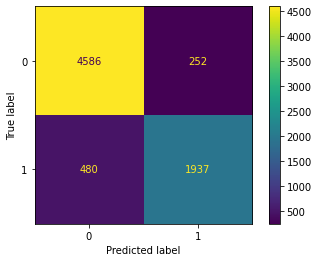

In [250]:
cm=confusion_matrix(test_labels,predictions,labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()